<a href="https://colab.research.google.com/github/aSafarpoor/OSN_FAD/blob/main/Data/Twibot_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_geometric
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00


In [71]:
import numpy as np
from tqdm.notebook import tqdm as tqdm
import csv
import networkx as nx

In [3]:
from matplotlib import pyplot as plt
import random
SEED = 10

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GINConv
from sklearn.metrics import roc_curve,accuracy_score, roc_auc_score, confusion_matrix
import torch.nn as nn

from node2vec import Node2Vec
from sklearn.cluster import KMeans

In [4]:
from sklearn.cluster import SpectralClustering

In [5]:
!dir

edges.txt  label.csv  sample_data


In [6]:
file_path = 'label.csv'
users = []
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        users.append(row)
users = users[1:]

In [7]:
set([x[1] for x in users])

{'bot', 'human'}

In [8]:
nodes = [x[0] for x in users]
benigns = [x[0] for x in users if x[1] == 'human']
sybils = [x[0] for x in users if x[1] == 'bot']
labeled = set(benigns)|set(sybils)

In [9]:
# file_path = 'edge.csv'
# edges = []
# with open(file_path, 'r') as file:
#     csv_reader = csv.reader(file)
#     for row in csv_reader:
#         edges.append(row)

# edges = edges[1:]
# set([x[1] for x in edges])

# edges = [[x[0],x[2]] for x in edges if x[1] != 'post']
# all_nodes = set([x[0] for x in edges]+[x[1] for x in edges])



In [10]:
'''
G.remove_nodes_from(list(set(leaves)-set(labeled_leaves)))

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print(2*num_edges/num_nodes)
'''

'\nG.remove_nodes_from(list(set(leaves)-set(labeled_leaves)))\n\nnum_edges = G.number_of_edges()\nnum_nodes = G.number_of_nodes()\nprint(2*num_edges/num_nodes)\n'

In [11]:
# with open('edges.txt', "w") as file:
#     for u, v in edges:
#         file.write(f"{u} {v}\n")

# print(f"Edges have been saved.")

file_path = 'edges.txt'
edges = []
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into nodes (adjust the delimiter if needed, e.g., ',' or '\t')
        nodes = line.strip().split()  # Use .split('\t') for tab-separated or .split(',') for CSV-style
        edges.append(nodes)

In [12]:
G = nx.Graph()
G.add_edges_from(edges)

In [13]:
# leaves = [node for node, degree in G.degree() if degree == 1]

# all_nodes = set(G.nodes).union(set(n for edge in edges for n in edge))
# single_nodes = [node for node in all_nodes if node not in G.nodes or G.degree[node] == 0]

# # Print the results
# print("Leaves:", len(leaves))
# print("Single Nodes:", len(single_nodes))

# labeled_leaves = []
# for node in leaves:
#     if node in labeled:
#         labeled_leaves.append(node)
# print(len(labeled_leaves))

In [14]:
othernodes = (set(list(G.nodes()))-set(benigns))-set(sybils)

In [15]:
# len(othernodes),len(benigns),len(sybils)

In [16]:
# len(G.nodes())

In [17]:
# node2vec = Node2Vec(G, dimensions=8, walk_length=15, num_walks=10, workers=4)
# model = node2vec.fit(window=8, min_count=1, batch_words=4)

# # Create a feature matrix where each row corresponds to a node's embedding
# node_ids = list(G.nodes())
# embeddings = [model.wv[str(node)] for node in tqdm(node_ids)]

# # Cluster embeddings into 5 clusters using KMeans
# n_clusters = 5
# kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# labels = kmeans.fit_predict(embeddings)

# # Group nodes by cluster
# clusters = {i: [] for i in tqdm(range(n_clusters))}
# for node, label in tqdm(zip(node_ids, labels)):
#     clusters[label].append(node)

# # Print the nodes in each cluster
# for cluster_id, nodes in clusters.items():
#     print(f"Cluster {cluster_id}: {len(nodes)}...")

In [18]:
# from sklearn.metrics.pairwise import euclidean_distances
# from scipy.optimize import linear_sum_assignment
# from sklearn.cluster import KMeans
# from scipy.sparse.linalg import eigsh  # For Laplacian eigenvectors
# from scipy.sparse import csr_matrix

'''
G = nx.barabasi_albert_graph(n=5, m=2)
G_duplicate = G.copy()
mapping = {node: node + 15 for node in G_duplicate.nodes()}
G_duplicate = nx.relabel_nodes(G_duplicate, mapping)
G = nx.compose(G, G_duplicate)


G.add_edges_from([[1,15]])

# Convert to sparse adjacency matrix
adj_matrix = nx.to_scipy_sparse_array(G, format='csr')

# Step 1: Compute the normalized Laplacian matrix
L = nx.normalized_laplacian_matrix(G)

# Step 2: Compute the top-k eigenvectors of the Laplacian
embedding_size = 2  # Desired size of embeddings
eigvals, eigvecs = eigsh(L, k=embedding_size, which='SM')  # Smallest eigenvalues

# Step 3: Use the eigenvectors as embeddings
features = eigvecs

unique_positions = {}
pos = {}
for i, node in enumerate(G.nodes):
    new_pos = (features[i, 0], features[i, 1])
    # new_pos = (
    #         new_pos[0] + np.random.uniform(-0.1, 0.1),
    #         new_pos[1] + np.random.uniform(-0.1, 0.1)
    # )
    unique_positions[node] = new_pos
    pos[node] = new_pos


# pos = {node: (features[i, 0], features[i, 1]) for i, node in enumerate(G.nodes)}

# Step 4: Plot the graph using the positions
plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Graph with Custom Positions from NumPy Array")
plt.show()
'''
# print()

In [19]:
# def spring_layout(G, k=None, iterations=50, threshold=1e-4, max_disp=0.1):
#     """
#     Stable spring layout to handle overflow and numerical issues.
#     """
#     import numpy as np

#     nodes = list(G.nodes)  # Handle arbitrary node indices
#     n = len(nodes)
#     node_index = {node: i for i, node in enumerate(nodes)}

#     if k is None:
#         k = 1 / np.sqrt(n)  # Default optimal distance

#     # Initialize random positions with small values
#     pos = np.random.uniform(-0.1, 0.1, (n, 2))

#     for _ in tqdm(range(iterations)):
#         displacement = np.zeros_like(pos)  # To store forces

#         # Compute repulsive forces
#         for i in tqdm(range(n)):
#             for j in range(i + 1, n):
#                 delta = pos[i] - pos[j]
#                 distance = np.linalg.norm(delta)
#                 if distance < 1e-6:
#                     delta = np.random.uniform(-0.01, 0.01, size=2)
#                     distance = np.linalg.norm(delta)
#                 force = min(k**2 / distance, max_disp)  # Cap maximum force
#                 displacement[i] += delta / distance * force
#                 displacement[j] -= delta / distance * force

#         # Compute attractive forces
#         for u, v in tqdm(G.edges):
#             u_idx = node_index[u]
#             v_idx = node_index[v]
#             delta = pos[u_idx] - pos[v_idx]
#             distance = np.linalg.norm(delta)
#             if distance < 1e-6:
#                 delta = np.random.uniform(-0.01, 0.01, size=2)
#                 distance = np.linalg.norm(delta)
#             force = min(distance**2 / k, max_disp)  # Cap maximum force
#             displacement[u_idx] -= delta / distance * force
#             displacement[v_idx] += delta / distance * force

#         # Update positions
#         displacement = np.clip(displacement, -max_disp, max_disp)  # Limit maximum displacement
#         pos += displacement
#         max_displacement = np.max(np.linalg.norm(displacement, axis=1))
#         if max_displacement < threshold:
#             break

#     # Map positions back to node labels
#     return {node: pos[i] for i, node in enumerate(nodes)}


In [20]:
# pos = spring_layout(G, k=0.1, iterations=100)

In [21]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec


In [59]:
Gtest = nx.barabasi_albert_graph(n=5, m=1)
G_duplicate = Gtest.copy()
mapping = {node: node + 10 for node in G_duplicate.nodes()}
G_duplicate = nx.relabel_nodes(G_duplicate, mapping)
Gtest = nx.compose(Gtest, G_duplicate)


G_duplicate = Gtest.copy()
mapping = {node: node + 30 for node in G_duplicate.nodes()}
G_duplicate = nx.relabel_nodes(G_duplicate, mapping)
Gtest = nx.compose(Gtest, G_duplicate)

Gtest.add_edges_from([[1,11],[11,31],[31,41]])

In [67]:
def generate_random_walks(graph, num_walks, walk_length):
    walks = []
    nodes = list(graph.nodes)
    for _ in tqdm(range(num_walks)):  # Perform multiple walks per node
        random.shuffle(nodes)  # Shuffle nodes for randomness
        for node in nodes:
            walks.append(random_walk(graph, node, walk_length))
    return walks

def random_walk(graph, start_node, walk_length):
    walk = [start_node]
    for _ in range(walk_length - 1):
        neighbors = list(graph.neighbors(walk[-1]))
        if len(neighbors) == 0:  # If no neighbors, end the walk
            break
        walk.append(random.choice(neighbors))
    return list( walk)  # Convert to strings for Word2Vec

num_walks = 30  # Number of walks per node
walk_length = 15  # Length of each walk
walks = generate_random_walks(Gtest, num_walks, walk_length)


class TQDMProgressBar(CallbackAny2Vec):
    def __init__(self, total_epochs):
        self.epoch_bar = tqdm(total=total_epochs, desc="Epochs Completed")

    def on_epoch_end(self, model):
        self.epoch_bar.update(1)

    def on_train_end(self, model):
        self.epoch_bar.close()

# Initialize Progress Bar Callback
total_epochs = 20
progress_bar = TQDMProgressBar(total_epochs=total_epochs)

# Train Word2Vec Model with Progress Bar
model = Word2Vec(
    sentences=walks,
    vector_size=2,  # Embedding size
    window=5,       # Context window size
    min_count=0,    # Minimum frequency for nodes
    sg=1,           # Skip-gram model
    workers=4,      # Parallel workers
    epochs=total_epochs,  # Number of training epochs
    callbacks=[progress_bar]  # Use the progress bar callback
)

# Step 4: Access Node Embeddings
embeddings = {node: model.wv[node] for node in Gtest.nodes}

<ipython-input-67-4f2d025f8697>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm(range(num_walks)):  # Perform multiple walks per node


  0%|          | 0/30 [00:00<?, ?it/s]

<ipython-input-67-4f2d025f8697>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  self.epoch_bar = tqdm(total=total_epochs, desc="Epochs Completed")


Epochs Completed:   0%|          | 0/20 [00:00<?, ?it/s]

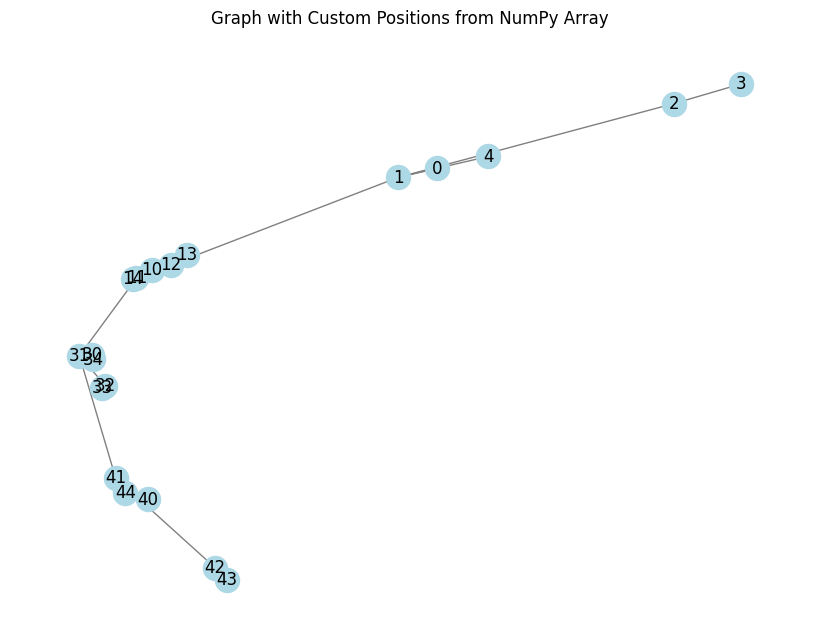

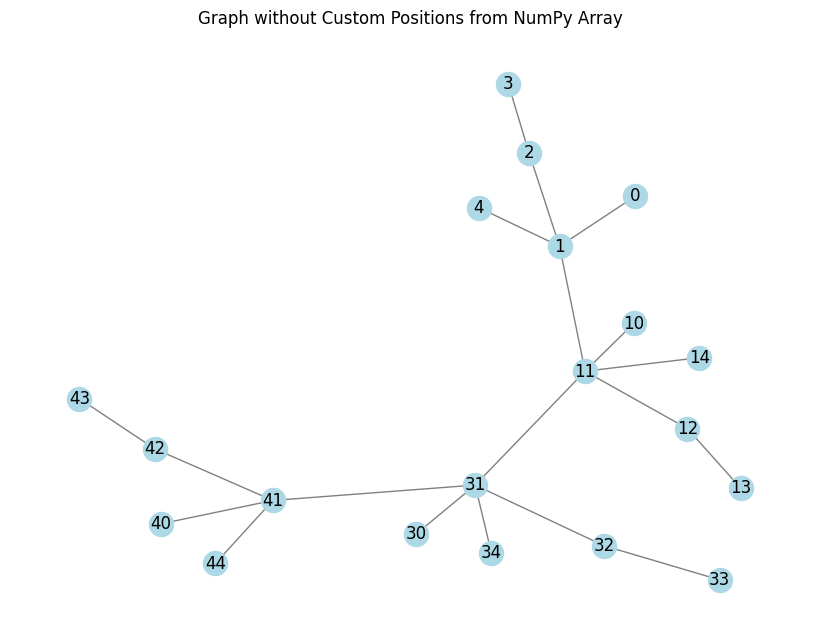

In [68]:
pos = embeddings
plt.figure(figsize=(8, 6))
nx.draw(Gtest, pos=pos, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Graph with Custom Positions from NumPy Array")
plt.show()

plt.figure(figsize=(8, 6))
nx.draw(Gtest, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("Graph without Custom Positions from NumPy Array")
plt.show()

In [35]:
# pos = nx.spring_layout(
#     G,
#     k=None,  # Optimal distance between nodes. Defaults to 1 / sqrt(n) for n nodes.
#     iterations=50,  # Number of iterations to adjust positions.
#     threshold=1e-4,  # Convergence threshold for position changes.
#     seed=10,  # Random seed for reproducibility.
#     weight=None  # Edge weight attribute. If None, all edges are considered equal.
# )


In [72]:
num_walks = 30  # Number of walks per node
walk_length = 15  # Length of each walk
walks = generate_random_walks(G, num_walks, walk_length)


class TQDMProgressBar(CallbackAny2Vec):
    def __init__(self, total_epochs):
        self.epoch_bar = tqdm(total=total_epochs, desc="Epochs Completed")

    def on_epoch_end(self, model):
        self.epoch_bar.update(1)

    def on_train_end(self, model):
        self.epoch_bar.close()

# Initialize Progress Bar Callback
total_epochs = 20
progress_bar = TQDMProgressBar(total_epochs=total_epochs)

# Train Word2Vec Model with Progress Bar
model = Word2Vec(
    sentences=walks,
    vector_size=2,  # Embedding size
    window=5,       # Context window size
    min_count=0,    # Minimum frequency for nodes
    sg=1,           # Skip-gram model
    workers=4,      # Parallel workers
    epochs=total_epochs,  # Number of training epochs
    callbacks=[progress_bar]  # Use the progress bar callback
)

# Step 4: Access Node Embeddings
embeddings = {node: model.wv[node] for node in G.nodes}

  0%|          | 0/30 [00:00<?, ?it/s]

Epochs Completed:  48%|████▊     | 954/2000 [06:33<07:11,  2.42it/s] 


Epochs Completed:   0%|          | 0/20 [00:00<?, ?it/s]

In [75]:
import pickle



with open('embeddings.pickle', 'wb') as handle:
    pickle.dump(embeddings, handle)

# with open('embeddings.pickle', 'rb') as handle:
#     b = pickle.load(embeddings)

In [73]:
# #  Cluster into balanced groups
# n_clusters = 5
# balanced_labels = balanced_kmeans(features, n_clusters)

# #  Group nodes by balanced clusters
# balanced_clusters = {i: [] for i in range(n_clusters)}
# for node, label in tqdm(enumerate(balanced_labels)):
#     balanced_clusters[label].append(node)

# for cluster_id, nodes in balanced_clusters.items():
#     print(f"Cluster {cluster_id}: {len(nodes)} nodes")

In [74]:
# balanced_clusters

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
keys = list(embeddings.keys())
features = np.array(list(embeddings.values()))

In [104]:
SEED = 1

In [125]:
allnodes = keys[:]

In [105]:
normalized_features = features / np.linalg.norm(features, axis=1, keepdims=True)

# Step 3: Perform clustering using KMeans
num_clusters = 3  # Number of clusters
SEED+=1
print(SEED)
kmeans = KMeans(n_clusters=num_clusters, random_state=SEED)
clusters = kmeans.fit_predict(normalized_features)

# Step 4: Group data points by clusters
clustered_points = {i: [] for i in range(num_clusters)}
for idx, label in enumerate(clusters):
    clustered_points[label].append(keys[idx])

# Step 5: Print clustered points
# for cluster, points in clustered_points.items():
#     print(f"Cluster {cluster}: {len(points)}")

bset = set(benigns)
sset = set(sybils)

for cluster, points in clustered_points.items():
    b = 0
    s = 0
    for point in points:
        if point in bset:
            b+=1
        elif point in sset:
            s+=1

    print(len(list(points))/(len(normalized_features)),b/len(bset),s/len(sset))

2
0.4033587712049774 0.4197059385144167 0.37031415996357564
0.41271083458902447 0.31964865380943286 0.446501745333131
0.18393039420599816 0.25873591751002484 0.18288055850660193


In [108]:
len(clustered_points[2])

37840

In [109]:
trainnodes = list(clustered_points[2])
testnodes = list(clustered_points[0])+list(clustered_points[1])

In [112]:
G.number_of_edges(),G.number_of_nodes(),"avg d:",G.number_of_edges()*2/G.number_of_nodes()

(226111, 205730, 'avg d:', 2.1981334759150344)

In [113]:
trainG = G.subgraph(trainnodes)
testG = G.subgraph(testnodes)


In [115]:
trainG.number_of_edges(),trainG.number_of_nodes(),"avg d:",trainG.number_of_edges()*2/trainG.number_of_nodes()

(39434, 37840, 'avg d:', 2.0842494714587736)

In [116]:
testG.number_of_edges(),testG.number_of_nodes(),"avg d:",testG.number_of_edges()*2/testG.number_of_nodes()

(174436, 167890, 'avg d:', 2.0779796295193282)

In [117]:
226111 - 39434 - 174436

12241

In [118]:
nx.number_connected_components(G)

123

In [119]:
nx.number_connected_components(trainG)

1471

In [120]:
nx.number_connected_components(testG)

1223

In [123]:
number_of_s_in_train = len(set(trainnodes) & sset)
number_of_b_in_train = len(set(trainnodes) & bset)
number_of_s_in_test = len(set(testnodes) & sset)
number_of_b_in_test = len(set(testnodes) & bset)

number_of_s_in_train,number_of_b_in_train,number_of_s_in_test,number_of_b_in_test

(1205, 1355, 5382, 3872)

#do random

In [121]:
import random

In [139]:
random.seed(15)
trainrandom = random.sample(allnodes,int(len(normalized_features)/5))
testrandom = list(set(allnodes)-set(trainnodes))

In [140]:
randomtrainG = G.subgraph(trainrandom)
randomtestG = G.subgraph(testrandom)

In [141]:
randomtrainG.number_of_edges(),randomtrainG.number_of_nodes(),"avg d:",randomtrainG.number_of_edges()*2/randomtrainG.number_of_nodes()

(9070, 41146, 'avg d:', 0.44086910027706216)

In [142]:
randomtestG.number_of_edges(),randomtestG.number_of_nodes(),"avg d:",randomtestG.number_of_edges()*2/randomtestG.number_of_nodes()

(174436, 167890, 'avg d:', 2.0779796295193282)

In [143]:
def leave_ratio(G):
    leaves = [node for node in G.nodes if G.degree[node] == 1]
    num_leaves = len(leaves)
    print(num_leaves/len(list(G.nodes())))

In [145]:
leave_ratio(randomtrainG)
leave_ratio(randomtestG)

0.2002867836484713
0.9056763356959914


In [146]:
leave_ratio(trainG)
leave_ratio(testG)

0.8572674418604651
0.9056763356959914


In [147]:
leave_ratio(G)


0.8951635638944248


In [148]:
file_name = "trainNodes.txt"

# Save nodes to a text file
with open(file_name, "w") as file:
    for node in trainG.nodes:
        file.write(f"{node}\n")

print(f"Nodes of the graph saved to '{file_name}'.")

Nodes of the graph saved to 'trainNodes.txt'.


In [149]:
file_name = "testNodes.txt"

# Save nodes to a text file
with open(file_name, "w") as file:
    for node in testG.nodes:
        file.write(f"{node}\n")

print(f"Nodes of the graph saved to '{file_name}'.")

Nodes of the graph saved to 'testNodes.txt'.
